In [4]:
import xarray as xr
import numpy as np

In [18]:
hadcrut5_path = '/home/adam/cloud/gdrive/postdoc/met_data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'
hadcrut5 = xr.open_dataset(hadcrut5_path)
land_ocean_weights = xr.open_dataset('/home/adam/cloud/gdrive/postdoc/met_data/HadCRUT.5.0.1.0.analysis.weights.nc')

In [37]:
target_lat = 37.68
target_lon = -119.67

This grid cell is driven by land surface temp anomalies

In [38]:
land_ocean_weights.sel(latitude=target_lat, longitude=target_lon, method = "nearest").weights

/home/adam/miniconda3/envs/postFireRegen/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/adam/miniconda3/envs/postFireRegen/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.DataArray 'weights' (time: 2083)>
array([0.995483, 0.995483, 0.995483, ..., 0.995483, 0.995483, 0.995483])
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2023-07-16T12:00:00
    latitude   float64 37.5
    longitude  float64 -117.5
Attributes:
    long_name:  fractional weight for land data in blending with marine obser...
    units:      1

In [39]:
hadcrut5_sierra = hadcrut5.sel(latitude=target_lat, longitude=target_lon, method = "nearest")

/home/adam/miniconda3/envs/postFireRegen/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/adam/miniconda3/envs/postFireRegen/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


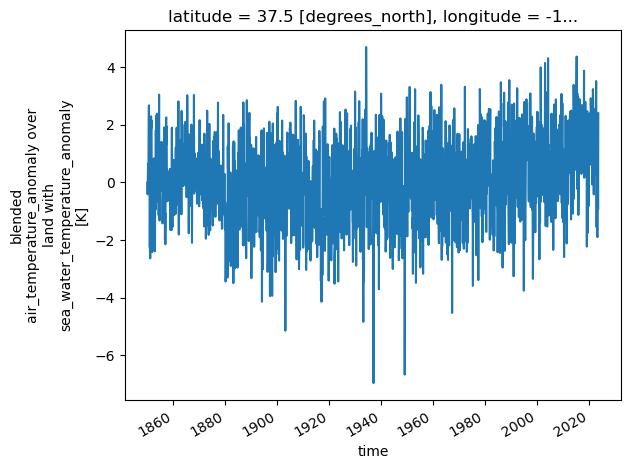

In [40]:
hadcrut5_sierra.tas_mean.plot()

The mean climate anomaly from 1950 to 1980 is almost identicle to the pre-industrial period (1850 to 1900), so we don't need to make any adjustments to the met data to drive a pre-industrial simulation.

In [41]:
pi_mean_anom = hadcrut5_sierra.sel(time = slice("1850-01-01","1899-12-31")).tas_mean.mean(dim = "time")
print(pi_mean_anom.values)

-0.058061193016606345


In [44]:
mean_anom_1950_1980 = hadcrut5_sierra.sel(time = slice("1950-01-01","1980-12-31")).tas_mean.mean(dim = "time")
print(mean_anom_1950_1980.values)

-0.04961054638671266
